## 机器视觉作业2
> 21025105 张泽西

拍摄校园两幅有重叠部分的照片，编写代码完成两幅图像拼接

1）选择一种特征点检测算法，在两幅图像上检测特征点

2）选择图像点特征的表示方法，通过特征比对实现两幅图像对应特征点的获取

3）选择合适的变换，通过对应特征点计算变换参数，实现图像的拼接

In [16]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [10]:
import cv2
import numpy as np

def stitch_images(img1, img2):
    # 1. 特征点检测
    detector = cv2.SIFT_create()  # 使用SIFT算法
    keypoints1, descriptors1 = detector.detectAndCompute(img1, None)
    keypoints2, descriptors2 = detector.detectAndCompute(img2, None)

    # 2. 特征点匹配
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(descriptors1, descriptors2, k=2)
    # 使用ratio测试筛选好的匹配
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    # 提取匹配的关键点
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    # 3. 计算单应性矩阵
    M, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    # 使用单应性变换合并图像
    stitched = cv2.warpPerspective(img1, M, (img1.shape[1] + img2.shape[1], img1.shape[0]))
    stitched[0:img2.shape[0], 0:img2.shape[1]] = img2

    return stitched

In [11]:
import matplotlib.pyplot as plt

def display_two_images(img1, img2):
    fig, axarr = plt.subplots(1, 2, figsize=(10,5))  # 1行，2列

    axarr[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    axarr[0].axis('off')  # 关闭坐标轴
    axarr[0].set_title('IMG1')

    axarr[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    axarr[1].axis('off')
    axarr[1].set_title('IMG2')

    plt.tight_layout()  
    plt.show()

def display_image(result):
    '''
    parameter: stitch_images(img1, img2)
    '''
    plt.figure(figsize=(10,5))
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

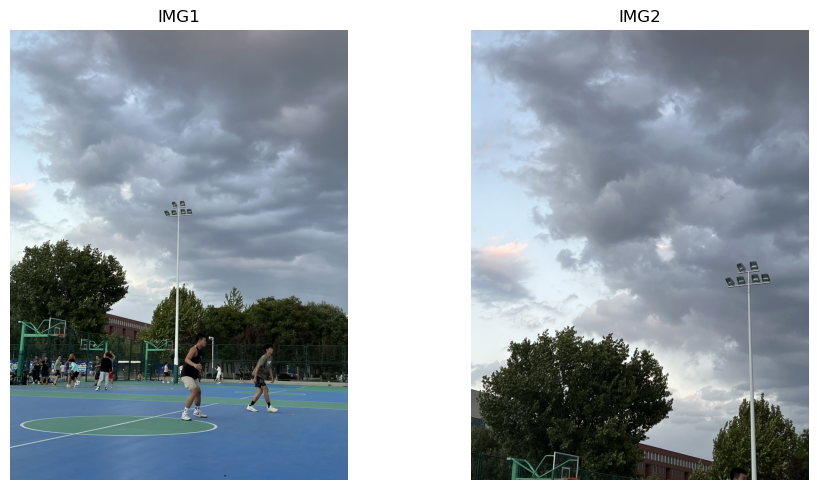

In [12]:
# 读取图像
img1 = cv2.imread('./figures/WechatIMG202.jpg')
img2 = cv2.imread('./figures/WechatIMG203.jpg')

display_two_images(img1, img2)

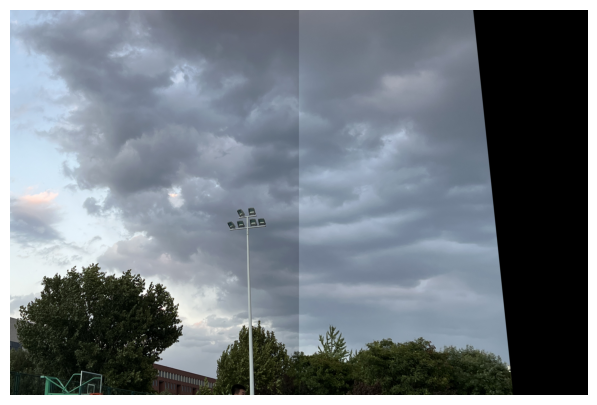

In [13]:
result_1 = stitch_images(img1, img2)

display_image(result_1)

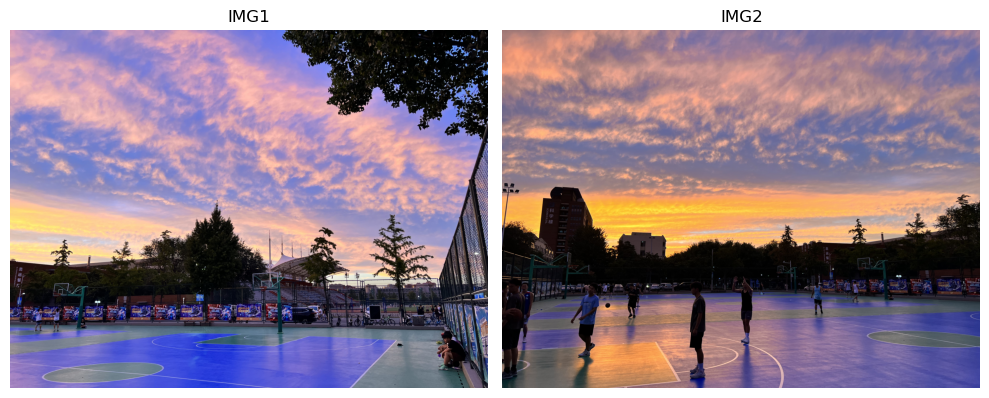

In [14]:
# 读取图像
img3 = cv2.imread('./figures/WechatIMG200.jpg')
img4 = cv2.imread('./figures/WechatIMG201.jpg')


display_two_images(img3, img4)

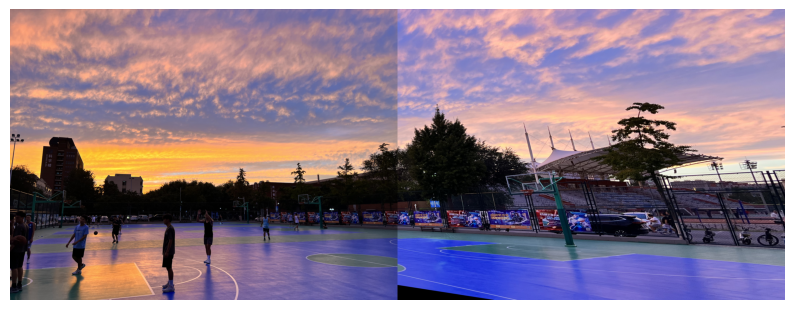

In [15]:
result_2 = stitch_images(img3, img4)

display_image(result_2)